      Cryptocurrencies  Price last information
0           BitcoinBTC                43980.93
1          EthereumETH                 2257.21
2      Tether USDtUSDT                    1.00
3               BNBBNB                  326.47
4            SolanaSOL                  103.70
..                 ...                     ...
95            BlurBLUR                    0.51
96  Curve DAO TokenCRV                    0.58
97           AxelarAXL                    1.14
98         Fetch.aiFET                    0.72
99           ArweaveAR                    9.14

[100 rows x 2 columns]
plot URL: file://C:\Users\bp111\OneDrive\Documentos\Code\cryptocurrency_price_changes_web_scraping/plot_coinmarketcap.png


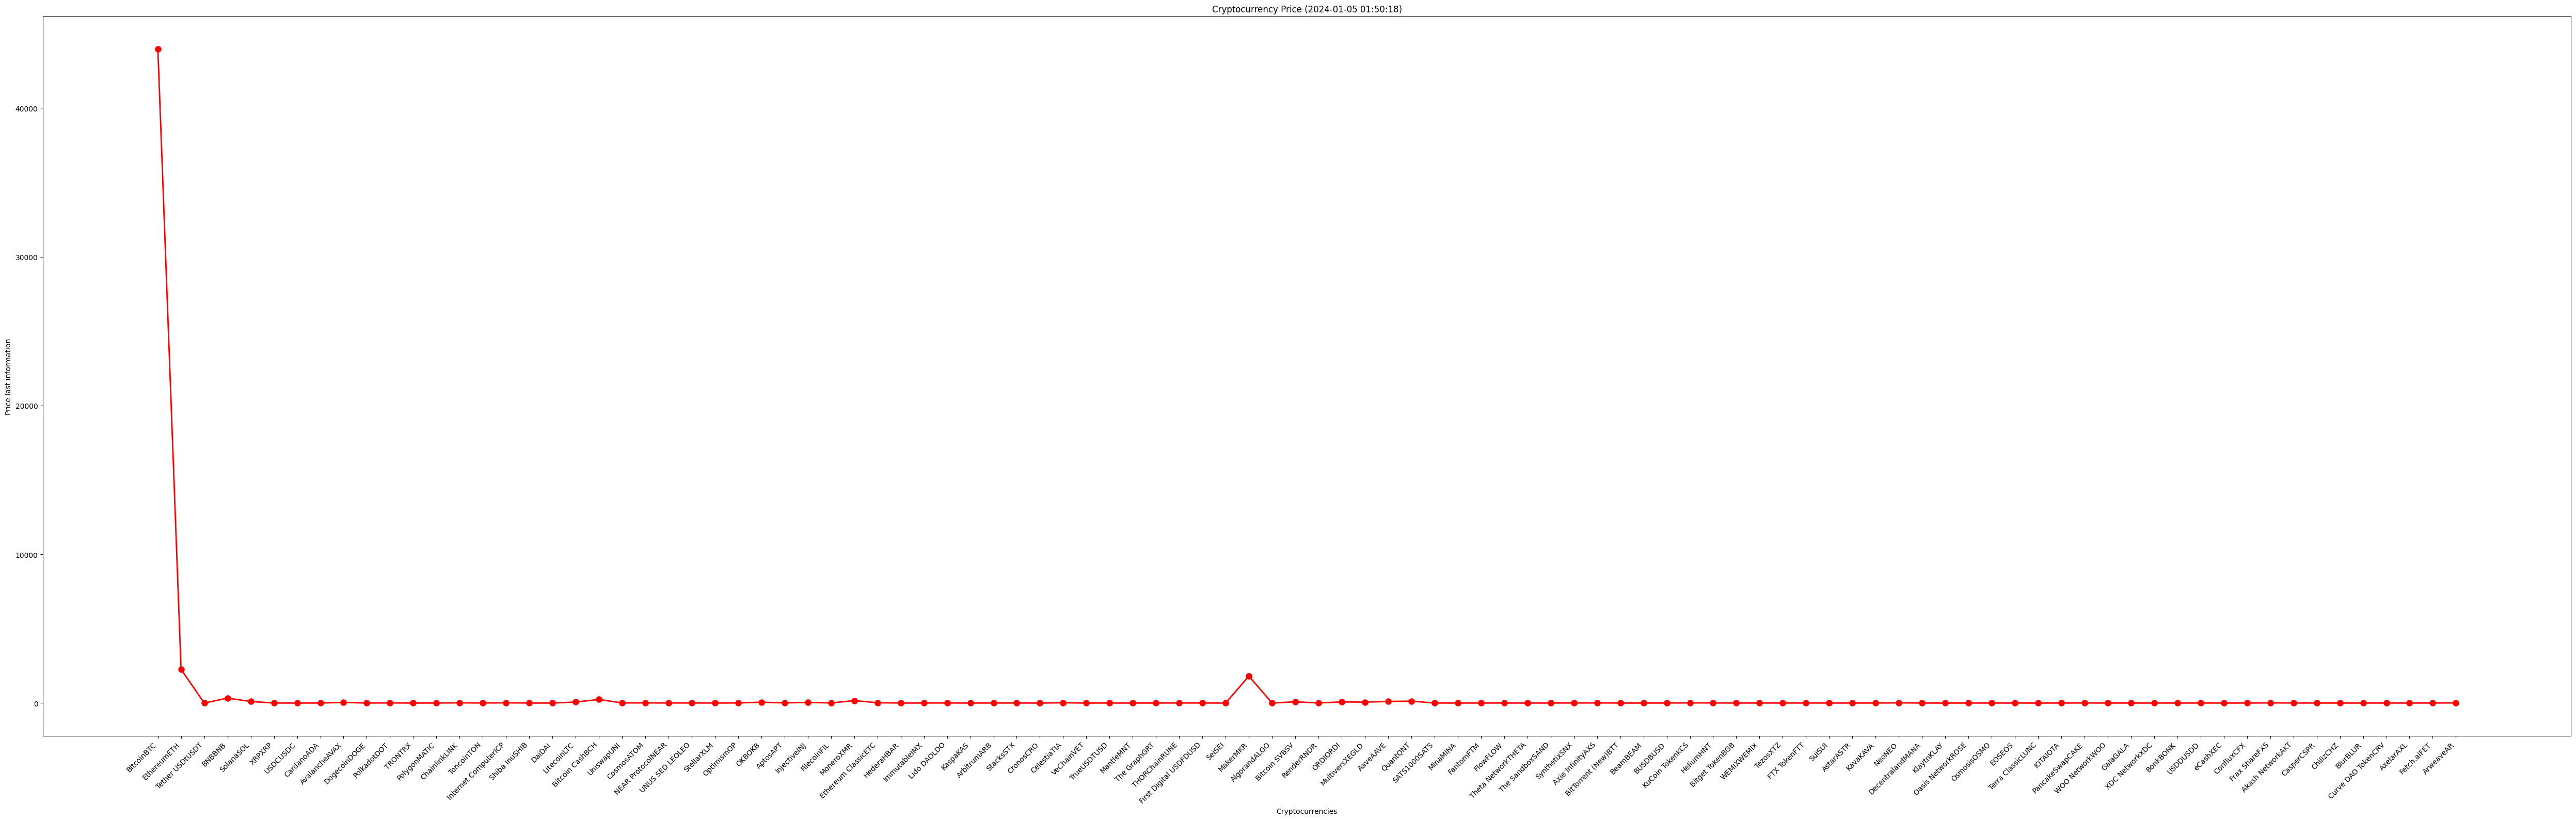

In [38]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re

def main():
    url = "https://coinmarketcap.com/"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        last_div = soup.select(".grid")[-1]

        if not last_div:
            print("DIV NOT found")
            return

        table = last_div.find('table')

        if not table:
            print("table NOT found inside DIV.")
            return

        thead = table.find('thead')
        if not thead:
            print("thead NOT found")
            return

        header_row = thead.find('tr')
        if not header_row:
            print("header row NOT found")
            return

        column_titles = [header.text.strip() for header in header_row.find_all('th')]
        if not ("Price" in column_titles and "Name" in column_titles):
            print("columns 'Price' and 'Name' NOT found.")
            return

        if 'Price' in column_titles and 'Name' in column_titles:
            price_index = column_titles.index('Price')
            name_index = column_titles.index('Name')

            rows = table.find_all('tr')

            data = []
            if len(rows) > 1:
                for row in rows[1:]:
                    column_values = [column.text.strip() for column in row.find_all('td')]

                    if len(column_values) > max(price_index, name_index):
                        coin_name = column_values[name_index].strip()
                        price_24h = re.sub(r'[^0-9.]?', "",column_values[price_index].strip())

                        data.append([coin_name,price_24h])

            if data:
                df = pd.DataFrame(data, columns=['Cryptocurrencies', 'Price last information'])

                df['Price last information'] = pd.to_numeric(df['Price last information'], errors='coerce')

                #show tabl
                print(df)
                
                spacing_between_currencies = 0.5  

                total_width_coins = len(df['Cryptocurrencies']) * spacing_between_currencies

                
                plt.figure(figsize=(total_width_coins, 16))

                 
                line_size = 2  
                size_marker = 8  

                plt.plot(df['Cryptocurrencies'], df['Price last information'], marker='o', markersize=size_marker, linestyle='-', linewidth=line_size, color='red')
                plt.title('Cryptocurrency Price (2024-01-05 01:50:18)')
                plt.xlabel('Cryptocurrencies')
                plt.ylabel('Price last information')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.savefig('plot_coin_market_cap.png')
                
                current_directory = os.getcwd()

                
                img_url = f'file://{current_directory}/plot_coinmarketcap.png'

                print("plot URL:", img_url)
                plt.show()
            else:
                print("There is not enough data to create the table")
        else:
            print("table without rows")
    else:
        print("Error accessing the page")



if __name__ == "__main__":
    main()